***自动求导***
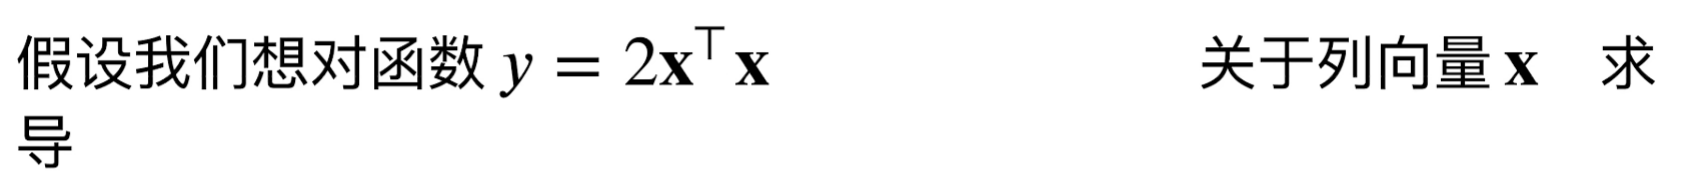

In [1]:
import torch
x=torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [4]:
#在计算y对x的梯度之前，我们需要一个地方来存储梯度
x.requires_grad_(True)  #等价于x=torch.arange(4.0，requires_grad=True) 把梯度存起来
x.grad  #默认值是None 之后通过这个调用就可以获取梯度

In [6]:
#计算y,y是一个标量,这是一个显示构造计算图，所以会告诉我们梯度存在grad_fn
y=2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [8]:
#通过调用反向传播函数来自动计算y关于x每个分量的梯度 4x
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [9]:
#验证梯度
x.grad==4*x

tensor([True, True, True, True])

In [13]:
#现在我们计算x的另一个函数
#默认情况下，pytorch会累积梯度，需要清除之前的值
x.grad.zero_()#这个下划线是指重载之前的内容
y=x.sum()#新函数
y.backward()
x.grad #求向量的sum梯度是全1

tensor([1., 1., 1., 1.])

In [14]:
#深度学习中，我们的目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和
#更多的是计算标量的梯度，而不是矩阵的梯度
x.grad.zero_()
y=x*x
y.sum().backward()#求和变成标量
x.grad

tensor([0., 2., 4., 6.])

In [15]:
#将某些计算移动到计算图之外
x.grad.zero_()
y=x*x
u=y.detach()#将y从向量变成一个常量，深度学习中，想将一部分网络参数固定住，不受反向传播的影响时有用
z=u*x
z.sum().backward()
x.grad==u

tensor([True, True, True, True])

In [16]:
x.grad.zero_()
y.sum().backward()
x.grad==2*x

tensor([True, True, True, True])

In [18]:
#python控制流，仍然可以计算得到变量的梯度
def f(a):
    b=a*2
    while b.norm()<1000:
        b=b*2
    if b.sum()>0:
        c=b
    else:
        c=100*b
    return c

a=torch.randn(size=(),requires_grad=True) #size为空是一个标量
d=f(a)
d.backward()

a.grad==d/a


#这就是pytorch隐式构造计算图的好处，对控制流友好，但是计算速度慢

tensor(True)

显示构造真正用的时候非常不方便
梯度累加：比如当你batch非常大的时候，一次算不完；或者在不同模型之间share
loss通常是一个标量
多个loss的时候需要累积梯度
求导的过程一般来说就是一个有向图
pytorch是支持向量求导的，但是非常慢